# Milestone 1  
You will submit a Jupyter notebook (Python 3) that implements fol-lowing instructions:
    1.  Load the MRI volumes
    2.  Determine the pixel spacing and slice thickness of each loaded volume
    3.  Extract, visualize, and save middle coronal slices for all training+validation cases, including the MRIs and segmentations.

<IPython.core.display.Javascript object>


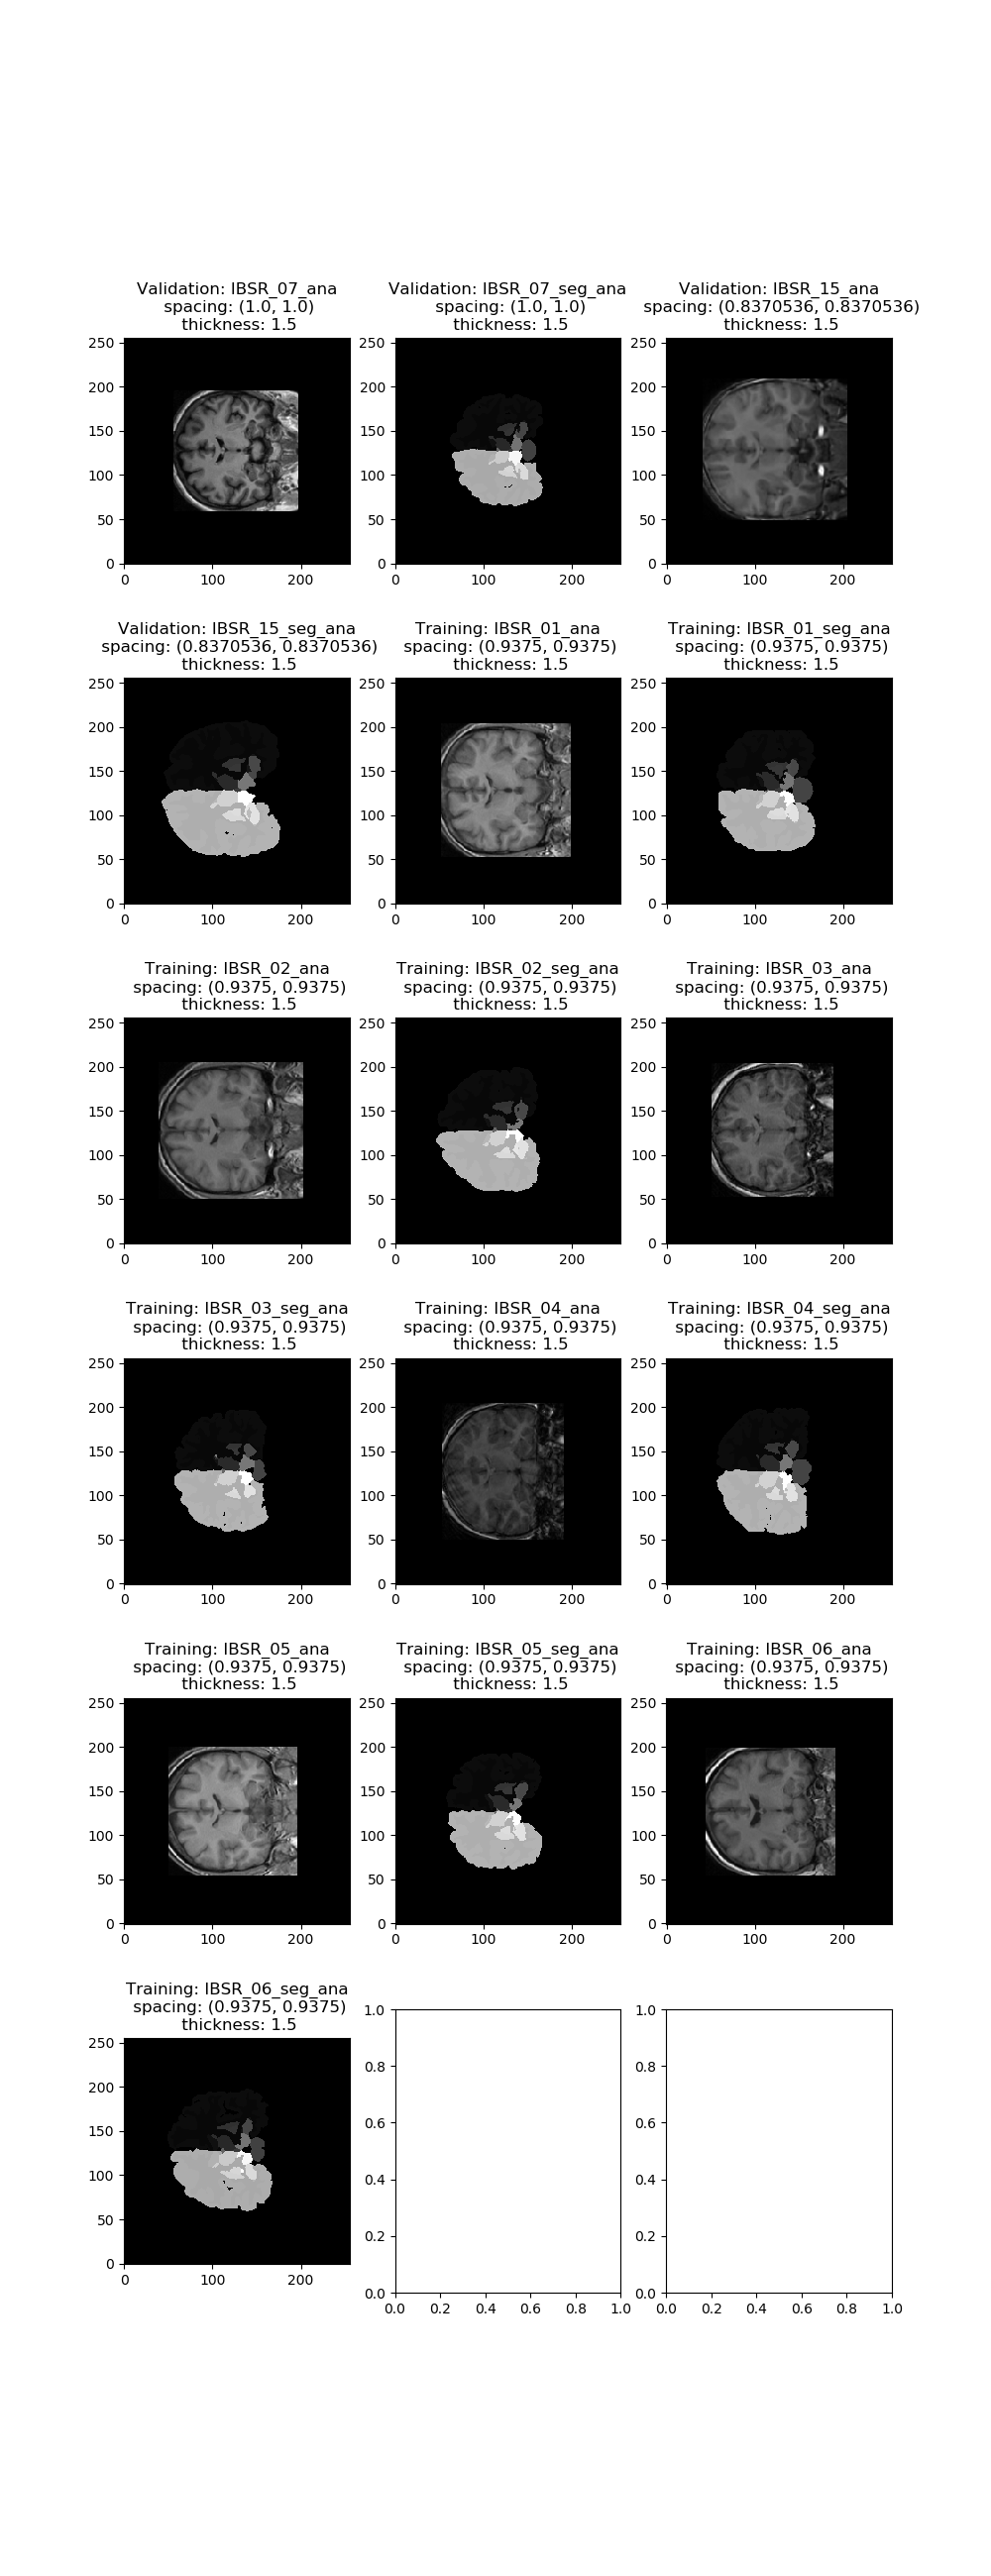

In [32]:
import os
from glob import glob
import numpy as np
import nibabel as nib
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib nbagg

def get_num_rows(val, cols):
    rows = val//cols
    if val%cols != 0:
        rows += 1
    return rows

def show_slices(value):
    """ Function to display row of image slices """
    for i, case in enumerate(cases):
        r,c = i//3, i%3
        axes[r,c].clear()
        axes[r,c].set_title(str(case["type"])+": "+str(case["name"])+
                            "\n spacing: "+ str(case["spacing"])+
                            "\n thickness: "+ str(case["thickness"]))
        axes[r,c].imshow(case["data"][:,:,value,0], cmap="gray", origin="lower")
    
    
cases = []
DATA_PATHS = ["./Validation/", "./Training/"]
for data_path in DATA_PATHS:
    for subDir0 in glob(data_path +"/*/"):
        for subDir1 in glob(subDir0 +"/*/"):
            ## generates the filenames with paths, and loads the image file
            [hdr_fpath, img_fpath, mat_fpath] = glob(subDir1 +"/analyze/*")
            img = nib.load(img_fpath)
            
            ## collects the name and pixel spacing information of each case
            img_data = img.get_fdata()
            spacing = img.header.get_zooms()[:2]
            thickness = img.header.get_zooms()[2]
            name = os.path.splitext(os.path.basename(img_fpath))[0]
            entry = {"name": name,"type": data_path[2:-1], 
                     "spacing": spacing, "thickness":thickness, 
                     "data": img_data}
            cases.append(entry)
            
            ## used to save the files
            coronal_slice = img_data[:,:,63,0]
            coronal_fpath = "./coronal_slices/"+ name +"_coronal.npy"
            np.save(coronal_fpath, coronal_slice)

## visualizes the all cases in a grid
coronal_slice_idx = 63
rows = get_num_rows(len(cases), 3)             
fig, axes = plt.subplots(rows, 3, figsize=(10,13*(rows/3)))
show_slices(coronal_slice_idx)

In [33]:
## makes the z-axiz interactive, with a sliding bar
int_range = widgets.IntSlider(min=0, max=127, value=63, description='Slider')
output2 = widgets.Output()
display(int_range, output2)
def on_value_change(change):
    with output2:
        show_slices(change["new"])
int_range.observe(on_value_change, names='value')

IntSlider(value=63, description='Slider', max=127)

Output()